In [503]:
import numpy as np
import pandas as pd

import requests
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
import scipy.stats as ss

sys.path.append('../../src/')
import toolbox

In [504]:
r = requests.get('http://data.thecrix.de/data/crix11.json').json()
VCRIX = pd.DataFrame(r)
VCRIX.date = pd.to_datetime(VCRIX.date)

# VCRIX.n = VCRIX.n.astype(np.int)

_id = VCRIX.date > '20180614'

VCRIX = VCRIX.loc[_id, :]

VCRIX.n = list(range(len(VCRIX)))

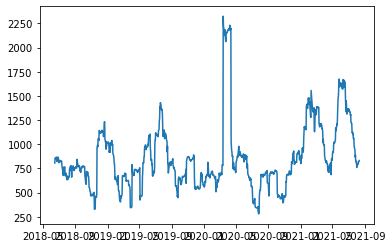

In [505]:
plt.plot(VCRIX.date, VCRIX.vcrix)

# thres = np.quantile(VCRIX.vcrix , 0.90)

thres = 1000
i = VCRIX.vcrix >=thres
# plt.scatter(VCRIX.date.loc[i], VCRIX.vcrix.loc[i], color='red')

stress_period = VCRIX.loc[i, :]

# for i in range(len(stress_period)-1):
#     start = training_Clayton.Date.iloc[i]
#     end =  training_Clayton.Date.iloc[i+1]
#     _end = end
#     plt.axvspan(start, end,facecolor='black', alpha=.2)

In [506]:
stress_period.date

1459   2018-11-26
1460   2018-11-27
1461   2018-11-28
1462   2018-11-29
1463   2018-11-30
          ...    
2424   2021-07-18
2425   2021-07-19
2426   2021-07-20
2427   2021-07-21
2428   2021-07-22
Name: date, Length: 283, dtype: datetime64[ns]

In [507]:
last_n = stress_period.iloc[0,:].n

start_arr = [stress_period.iloc[0,:].date]
end_arr = []

for row_i in range(1, len(stress_period)-2):
    
    last_n = stress_period.iloc[row_i-1,:].n
    n  = stress_period.iloc[row_i,:].n
    next_n = stress_period.iloc[row_i+1,:].n
    next_next_n = stress_period.iloc[row_i+2,:].n

    
    if (next_n-n>1):
        end_arr.append(stress_period.iloc[row_i,:].date)

    if n-last_n>1:
        start_arr.append(stress_period.iloc[row_i,:].date)

        
end_arr.append(stress_period.iloc[-1,:].date)

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


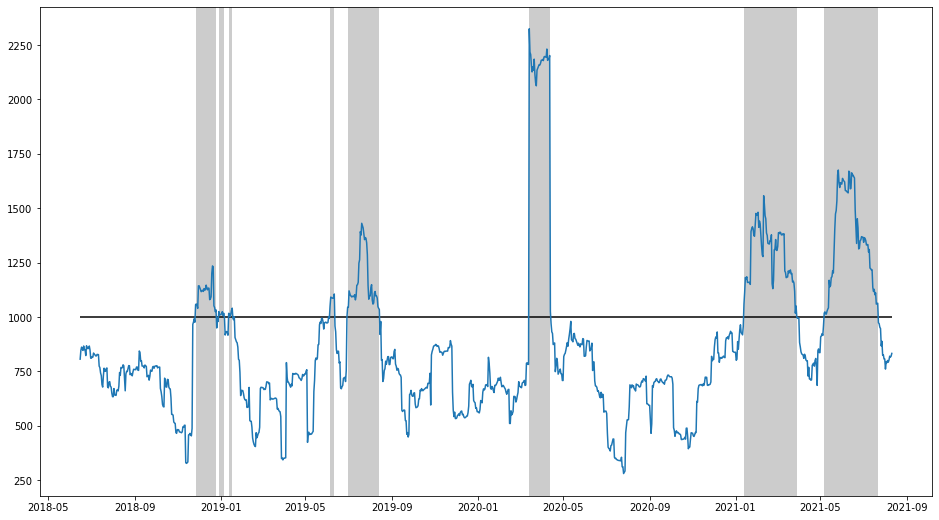

In [508]:
plt.figure(figsize=(16,9))
plt.plot(VCRIX.date, VCRIX.vcrix)

plt.hlines(y=thres, xmin=VCRIX.iloc[0,:].date, xmax=VCRIX.iloc[-1,:].date)


# plt.plot(stress_period.date, stress_period.vcrix)
for i in range(len(start_arr)):
    start = start_arr[i]
    end =  end_arr[i]
    plt.axvspan(start, end, facecolor='black', alpha=.2)

In [509]:
np.array(end_arr)  - np.array(start_arr) 

array([Timedelta('29 days 00:00:00'), Timedelta('7 days 00:00:00'),
       Timedelta('5 days 00:00:00'), Timedelta('0 days 00:00:00'),
       Timedelta('0 days 00:00:00'), Timedelta('6 days 00:00:00'),
       Timedelta('45 days 00:00:00'), Timedelta('30 days 00:00:00'),
       Timedelta('75 days 00:00:00'), Timedelta('76 days 00:00:00')],
      dtype=object)

In [510]:
for i in range(len(start_arr)):
    print(start_arr[i], end_arr[i])

2018-11-26 00:00:00 2018-12-25 00:00:00
2018-12-29 00:00:00 2019-01-05 00:00:00
2019-01-12 00:00:00 2019-01-17 00:00:00
2019-01-20 00:00:00 2019-01-20 00:00:00
2019-06-03 00:00:00 2019-06-03 00:00:00
2019-06-05 00:00:00 2019-06-11 00:00:00
2019-06-30 00:00:00 2019-08-14 00:00:00
2020-03-14 00:00:00 2020-04-13 00:00:00
2021-01-13 00:00:00 2021-03-29 00:00:00
2021-05-07 00:00:00 2021-07-22 00:00:00


In [544]:
result_names = ['BBT_Tiingo',
                'BBT_future_Tiingo_ada', 
                'BBT_future_Tiingo_eth',
                'BBT_future_Tiingo_ltc',
                'BBT_future_Tiingo_xrp',
                'BBT_future_BITX',
                'BBT_future_BITW20', 
                'BBT_future_BITW70', 
                'BBT_future_BITW100', 
                'BBT_future_CRIX']

# result_names = ['BBT_future_CRIX']

coin_names = ['bitcoin', 'ada', 'eth', 'ltc', 'xrp',
              'BITX', 'BITW20', 'BITW70', 'BITW100', 'CRIX']

i = 2
data_name = result_names[i]
coin_name = coin_names[i]
# objective = 'ERM k=10'
# objective = 'ES q=0.01'
objective = 'VaR q=0.01'

print(data_name, coin_name, objective)

rh_df = pd.read_csv('../../results/%s/MM/rh_%s_copula_selection.csv'%(data_name, objective))

BBT_future_Tiingo_eth eth VaR q=0.01


In [661]:
rm_arr =  [ 'ERM k=10', 'ES q=0.01', 'ES q=0.05', 'VaR q=0.01', 'VaR q=0.05', 'Variance']


for i, data_name in enumerate(result_names):

    rh_df = pd.read_csv('../../results/%s/MM/rh_%s_copula_selection.csv'%(data_name, rm_arr[0]))
    SS = summary_statistics(rh_df.rh, rm_arr[0])
    
    CH = create_CH(data_name, coin_names[i])
    
    for rm in rm_arr[1:]:
        rh_df = pd.read_csv('../../results/%s/MM/rh_%s_copula_selection.csv'%(data_name, rm))
        SS = SS.append(summary_statistics(rh_df.rh, rm))
    
    SS = SS.append(summary_statistics(CH.rh, 'cross hedge'))

    print('\\begin{table}[h!]\n\\begin{center}\n\\noindent\makebox[\\textwidth]{'+
              SS.to_latex()
             +
             '}\\end{center}\\caption{\\label{tab:table%i} PnL %s}\n\\end{table}'%(i, coin_names[i]))


\begin{table}[h!]
\begin{center}
\noindent\makebox[\textwidth]{\begin{tabular}{lrrrrrr}
\toprule
{} &      Mean &       Std &      Skew &       Kurt &       Max &       Min \\
\midrule
ERM k=10    &  0.000152 &  0.004024 & -0.887634 &  11.020213 &  0.021803 & -0.032170 \\
ES q=0.01   &  0.000227 &  0.004312 & -0.349981 &  11.489159 &  0.028558 & -0.031765 \\
ES q=0.05   &  0.000157 &  0.004095 & -0.856756 &  10.482390 &  0.021846 & -0.032105 \\
VaR q=0.01  &  0.000154 &  0.004109 & -0.826657 &  10.426674 &  0.021844 & -0.032109 \\
VaR q=0.05  &  0.000155 &  0.004128 & -0.910146 &  10.715665 &  0.021750 & -0.032248 \\
Variance    &  0.000200 &  0.003966 & -0.881272 &  11.274840 &  0.021938 & -0.031970 \\
cross hedge &  0.000186 &  0.003867 & -0.898417 &  11.958310 &  0.022089 & -0.031746 \\
\bottomrule
\end{tabular}
}\end{center}\caption{\label{tab:table0} PnL bitcoin}
\end{table}
\begin{table}[h!]
\begin{center}
\noindent\makebox[\textwidth]{\begin{tabular}{lrrrrrr}
\toprule
{} &      

In [545]:
rh_df.Date = pd.to_datetime(rh_df.Date.apply(lambda x: x[:10]))

In [546]:
s_id = rh_df.Date.apply(lambda x: x in list(stress_period.date))

In [547]:
train_path = '../../processed_data/%s/train/'%data_name
test_path = '../../processed_data/%s/test/'%data_name

files = [f for f in os.listdir(train_path) if f.endswith('.csv')]

test_arr = []

for f in files:
    train = pd.read_csv(train_path+f)
    test = pd.read_csv(test_path+f)
    rs = train.iloc[:,-1]
    rf = train.iloc[:,-2]
    rho = np.corrcoef(rs,rf)[0,1]
    rs_std = np.std(rs)
    rf_std = np.std(rf)
    h = rho*rs_std/rf_std
    test.loc[:,'h_CH'] = h
    test_arr.append(test)
    
CH = pd.concat(test_arr)
CH.Date = pd.to_datetime(CH.Date)
CH = CH.sort_values('Date', ascending=False)

CH.reset_index(drop=True, inplace=True)
CH.loc[:,'rh'] = CH.loc[:,'log return %s'%coin_name] - CH.loc[:,'h_CH']* CH.loc[:,'log return future']

In [558]:
def create_CH(data_name, coin_name):
    train_path = '../../processed_data/%s/train/'%data_name
    test_path = '../../processed_data/%s/test/'%data_name

    files = [f for f in os.listdir(train_path) if f.endswith('.csv')]

    test_arr = []

    for f in files:
        train = pd.read_csv(train_path+f)
        test = pd.read_csv(test_path+f)
        rs = train.iloc[:,-1]
        rf = train.iloc[:,-2]
        rho = np.corrcoef(rs,rf)[0,1]
        rs_std = np.std(rs)
        rf_std = np.std(rf)
        h = rho*rs_std/rf_std
        test.loc[:,'h_CH'] = h
        test_arr.append(test)

    CH = pd.concat(test_arr)
    CH.Date = pd.to_datetime(CH.Date)
    CH = CH.sort_values('Date', ascending=False)

    CH.reset_index(drop=True, inplace=True)
    CH.loc[:,'rh'] = CH.loc[:,'log return %s'%coin_name] - CH.loc[:,'h_CH']* CH.loc[:,'log return future']
    
    return CH

,Mean,Std,Skew,Kurt,Max,Min
a,0.000781,0.008854,0.037734,14.990359,0.058123,-0.0711


/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/francis/opt/anaconda3/lib/python3.7/site-pack

avg h 
copula     :0.967 
cross hedge:1.002


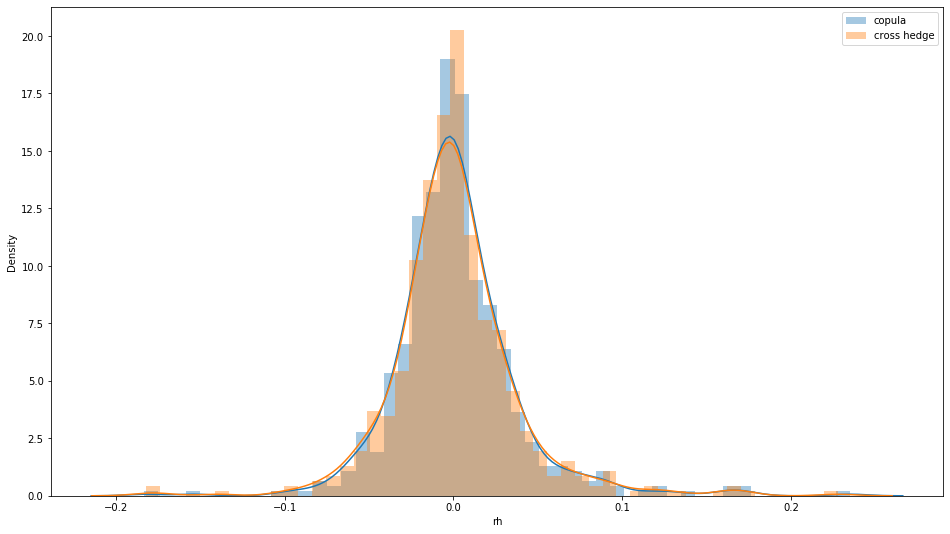

In [549]:
plt.figure(figsize=(16,9))

# sns.distplot(rh_df.new_rh)
sns.distplot(rh_df.rh, label='copula')
sns.distplot(CH.rh, label='cross hedge')
plt.legend()
print('avg h', '\ncopula     :%.3f'%np.mean(rh_df.h),  '\ncross hedge:%.3f'%np.mean(CH.h_CH))

In [649]:
def risk_statistics(rh, name):

    ERM = toolbox.ERM_estimate_trapezoidal(10, rh)
    ES1 = toolbox.ES(0.01, rh)
    ES5 = toolbox.ES(0.05, rh)
    VaR1 = toolbox.VaR(0.01, rh)
    VaR5 = toolbox.VaR(0.05, rh)
    Var = toolbox.Variance(rh)
    
    _dict = {'ERM':ERM, 'ES1':ES1, 'ES5':ES5, 'VaR1':VaR1, 
             'VaR5':VaR5, 'Var':Var}
    
    return pd.DataFrame([_dict], [name])


# Table 1a: Moments, dependency with future, start and end
def summary_statistics(rs, name):
    
    m1 = np.mean(rs)
    m2 = np.std(rs)
    m3 = ss.skew(rs) # Pearson coefficient of skewness
    m4 = ss.kurtosis(rs) # Pearson coefficient of kurtosis

    _max = np.max(rs)
    _min = np.min(rs)

    
    _dict = {'Mean':m1, 'Std':m2, 'Skew':m3, 'Kurt':m4, 
            'Max':_max, 'Min':_min}
    
    return pd.DataFrame([_dict], [name])

In [551]:
print('Summary Statistics', coin_name, objective)
summary_statistics(rh_df.rh, 'copula')\
    .append(summary_statistics(CH.rh, 'cross hedge'))\
    .append(summary_statistics(rh_df.rs, 'spot'))

Summary Statistics eth VaR q=0.01


,m1,m2,m3,m4,max,min
copula,0.001444,0.036613,1.055778,7.244267,0.235111,-0.183561
cross hedge,0.000813,0.037976,0.801399,6.446427,0.227673,-0.182093
spot,0.005437,0.058706,-0.324921,4.800456,0.315242,-0.320144


In [552]:
print('Summary Statistics', coin_name, objective)
summary_statistics(rh_df.loc[s_id, 'rh'], 'copula in stress period')\
    .append(summary_statistics(CH.loc[s_id,'rh'], 'cross hedge in stress period'))\
    .append(summary_statistics(rh_df.loc[s_id,'rs'], 'spot in stress period'))

Summary Statistics eth VaR q=0.01


,m1,m2,m3,m4,max,min
copula in stress period,-0.001918,0.044963,0.176561,4.626810,0.172787,-0.183561
cross hedge in stress period,-0.001979,0.046380,0.090828,4.411544,0.169239,-0.182093
spot in stress period,-0.000102,0.069752,-0.480552,1.925811,0.197551,-0.269777


In [566]:
print(coin_name, objective)
copula_vs_crosshedge = risk_statistics(rh_df.rh, 'copula')\
    .append(risk_statistics(CH.rh, 'cross hedge'))
    
diff = pd.DataFrame({'% relative diff':100*(copula_vs_crosshedge.iloc[0,:]-copula_vs_crosshedge.iloc[1,:])/copula_vs_crosshedge.iloc[1,:]}).T
copula_vs_crosshedge = copula_vs_crosshedge.append(diff).append(risk_statistics(rh_df.rs, 'spot'))
copula_vs_crosshedge


bitcoin ERM k=10


,ERM,ES1,ES5,VaR1,VaR5,Var
copula,0.005824,0.017070,0.010228,0.011756,0.006211,0.000016
cross hedge,0.005621,0.016612,0.009939,0.010840,0.006017,0.000015
% relative diff,3.614733,2.755398,2.908584,8.448265,3.228770,5.841020
spot,0.066608,0.190451,0.115618,0.136746,0.063220,0.002197


In [568]:
print(coin_name, objective)
copula_vs_crosshedge_stressperiod = risk_statistics(rh_df.loc[s_id, 'rh'], 'copula in stress period')\
    .append(risk_statistics(CH.loc[s_id,'rh'], 'cross hedge in stress period'))

diff = pd.DataFrame({'% relative diff':100*(copula_vs_crosshedge_stressperiod.iloc[0,:]-copula_vs_crosshedge_stressperiod.iloc[1,:])/copula_vs_crosshedge_stressperiod.iloc[1,:]}).T
copula_vs_crosshedge_stressperiod = copula_vs_crosshedge_stressperiod.append(diff).append(risk_statistics(rh_df.loc[s_id,'rs'], 'spot in stress period'))
list(copula_vs_crosshedge.columns)

bitcoin ERM k=10


['ERM', 'ES1', 'ES5', 'VaR1', 'VaR5', 'Var']

In [606]:
rm_arr =  [ 'ERM k=10', 'ES q=0.01', 'ES q=0.05', 'VaR q=0.01', 'VaR q=0.05', 'Variance']
# results = {}

for i in range(len(result_names)):
    data_name = result_names[i]
    coin_name = coin_names[i]
    CH = create_CH(data_name, coin_name)

    _index = ['copula', 'cross hedge', '% relative diff', 'spot']
    _index_stress = ['copula in stress period',
             'cross hedge in stress period',
             '% relative diff',
             'spot in stress period']
    columns = ['ERM', 'ES1', 'ES5', 'VaR1', 'VaR5', 'Var']
    copula_vs_crosshedge_result = pd.DataFrame(index=_index, columns=columns)
    copula_vs_crosshedge_stressperiod_result = pd.DataFrame(index=_index_stress, columns=columns)

    for j, objective in enumerate(rm_arr):
        rh_df = pd.read_csv('../../results/%s/MM/rh_%s_copula_selection.csv'%(data_name, objective))
#         print(data_name, coin_name, objective)
        
        copula_vs_crosshedge = risk_statistics(rh_df.rh, 'copula')\
        .append(risk_statistics(CH.rh, 'cross hedge'))
    
        diff = pd.DataFrame({'% relative diff':100*(copula_vs_crosshedge.iloc[0,:]-copula_vs_crosshedge.iloc[1,:])/copula_vs_crosshedge.iloc[1,:]}).T
        copula_vs_crosshedge = copula_vs_crosshedge.append(diff).append(risk_statistics(rh_df.rs, 'spot'))
        copula_vs_crosshedge_result.iloc[:,j] = copula_vs_crosshedge.iloc[:,j]
        
        
        copula_vs_crosshedge_stressperiod = risk_statistics(rh_df.loc[s_id, 'rh'], 'copula in stress period')\
        .append(risk_statistics(CH.loc[s_id,'rh'], 'cross hedge in stress period'))

        diff = pd.DataFrame({'% relative diff':100*(copula_vs_crosshedge_stressperiod.iloc[0,:]-copula_vs_crosshedge_stressperiod.iloc[1,:])/copula_vs_crosshedge_stressperiod.iloc[1,:]}).T
        copula_vs_crosshedge_stressperiod = copula_vs_crosshedge_stressperiod.append(diff).append(risk_statistics(rh_df.loc[s_id,'rs'], 'spot in stress period'))
        copula_vs_crosshedge_stressperiod_result.iloc[:,j] = copula_vs_crosshedge_stressperiod.iloc[:,j]

    copula_vs_crosshedge_result.to_csv('../../results/%s/MM/copula_vs_crosshedge.csv'%data_name)
    copula_vs_crosshedge_stressperiod_result.to_csv('../../results/%s/MM/copula_vs_crosshedge_stressperiod.csv'%data_name)

In [645]:
for i in range(len(result_names)):
    data_name = result_names[i]
#     print(coin_names[i])
    r = pd.read_csv('../../results/%s/MM/copula_vs_crosshedge.csv'%data_name).append(pd.read_csv('../../results/%s/MM/copula_vs_crosshedge_stressperiod.csv'%data_name))
    r.index = list(r.iloc[:,0])
    r = r.iloc[:,1:]

    print('\\begin{table}[h!]\n\\begin{center}\n\\noindent\makebox[\\textwidth]{'+
          r.to_latex()
         +
         '}\\end{center}\\caption{\\label{tab:table%i} HE comparison %s}\n\\end{table}'%(i, data_name.replace('_', ' ')))

\begin{table}[h!]
\begin{center}
\noindent\makebox[\textwidth]{\begin{tabular}{lrrrrrr}
\toprule
{} &       ERM &       ES1 &       ES5 &      VaR1 &      VaR5 &       Var \\
\midrule
copula                       &  0.005824 &  0.017774 &  0.010284 &  0.011473 &  0.006050 &  0.000016 \\
cross hedge                  &  0.005621 &  0.016612 &  0.009939 &  0.010840 &  0.006017 &  0.000015 \\
\% relative diff              &  3.614733 &  6.994292 &  3.477070 &  5.840867 &  0.550620 &  3.673729 \\
spot                         &  0.066608 &  0.190451 &  0.115618 &  0.136746 &  0.063220 &  0.002197 \\
copula in stress period      &  0.005761 &  0.012901 &  0.009832 &  0.010900 &  0.007304 &  0.000015 \\
cross hedge in stress period &  0.005587 &  0.012947 &  0.009621 &  0.010978 &  0.007088 &  0.000015 \\
\% relative diff              &  3.105702 & -0.362275 &  2.198498 & -0.709928 &  3.036827 &  3.462588 \\
spot in stress period        &  0.076401 &  0.155970 &  0.123428 &  0.124419 &  0.0979

In [643]:
print('\\begin{table}[h!]\n\\begin{center}\n\\noindent\makebox[\\textwidth]{'+
      r.to_latex()
     +
     '}\\end{center}\\caption{\\label{tab:table%i} HE comparison %s}\n\\end{table}'%(i, data_name.replace('_', ' ')))

\begin{table}[h!]
\begin{center}
\noindent\makebox[\textwidth]{\begin{tabular}{lrrrrrr}
\toprule
{} &       ERM &       ES1 &       ES5 &      VaR1 &      VaR5 &       Var \\
\midrule
copula                       &  0.010219 &  0.030425 &  0.017260 &  0.017060 &  0.009533 &  0.000078 \\
cross hedge                  &  0.010083 &  0.031857 &  0.017184 &  0.017522 &  0.009238 &  0.000078 \\
\% relative diff              &  1.347764 & -4.493722 &  0.444115 & -2.635645 &  3.198000 & -0.406715 \\
spot                         &  0.064772 &  0.178374 &  0.114805 &  0.139618 &  0.062770 &  0.001990 \\
copula in stress period      &  0.015169 &  0.068021 &  0.031656 &  0.032183 &  0.016373 &  0.000171 \\
cross hedge in stress period &  0.015036 &  0.071100 &  0.031598 &  0.032708 &  0.016045 &  0.000174 \\
\% relative diff              &  0.884965 & -4.331002 &  0.182983 & -1.606256 &  2.048019 & -1.648355 \\
spot in stress period        &  0.100992 &  0.271385 &  0.173078 &  0.176042 &  0.1291

BBT_future_CRIX CRIX VaR q=0.01


/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


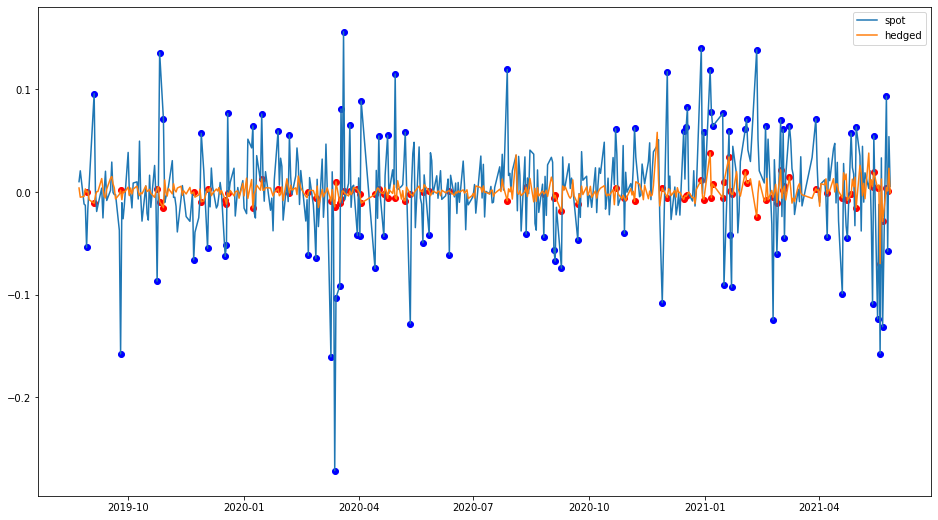

In [691]:
data_name = result_names[i]
coin_name = coin_names[i]
# objective = 'ERM k=10'
# objective = 'ES q=0.01'
objective = 'VaR q=0.01'

print(data_name, coin_name, objective)

rh_df = pd.read_csv('../../results/%s/MM/rh_%s_copula_selection.csv'%(data_name, objective))
_id = (rh_df.rs <= np.quantile(rh_df.rs,0.1)) 

_id_u =  (rh_df.rs >= np.quantile(rh_df.rs,0.9))

plt.figure(figsize=(16,9))
rh_df.Date = pd.to_datetime(rh_df.Date)

# plt.plot(np.cumsum(rh_df.rh), label='hedged')
# plt.plot(np.cumsum(rh_df.rs), label='spot')
plt.plot(rh_df.Date, rh_df.rs, label='spot')
plt.plot(rh_df.Date, rh_df.rh, label='hedged')

plt.scatter(rh_df.Date.loc[_id], rh_df.rs.loc[_id], color='blue')
plt.scatter(rh_df.Date.loc[_id], rh_df.rh.loc[_id], color='red')

plt.scatter(rh_df.Date.loc[_id_u], rh_df.rs.loc[_id_u], color='blue')
plt.scatter(rh_df.Date.loc[_id_u], rh_df.rh.loc[_id_u], color='red')

plt.legend()

In [695]:
result_names

['BBT_Tiingo',
 'BBT_future_Tiingo_ada',
 'BBT_future_Tiingo_eth',
 'BBT_future_Tiingo_ltc',
 'BBT_future_Tiingo_xrp',
 'BBT_future_BITX',
 'BBT_future_BITW20',
 'BBT_future_BITW70',
 'BBT_future_BITW100',
 'BBT_future_CRIX']

BBT_future_Tiingo_eth eth ERM k=10


/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


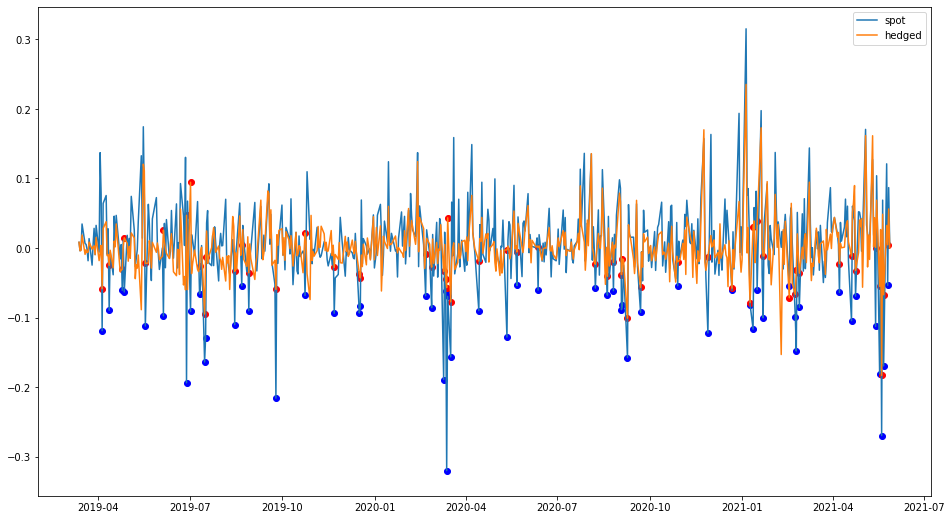

In [700]:
i=2
data_name = result_names[i]
coin_name = coin_names[i]
objective = 'ERM k=10'
# objective = 'ES q=0.01'
# objective = 'VaR q=0.01'

print(data_name, coin_name, objective)

rh_df = pd.read_csv('../../results/%s/MM/rh_%s_copula_selection.csv'%(data_name, objective))
_id = rh_df.rs <= np.quantile(rh_df.rs,0.1)

plt.figure(figsize=(16,9))
rh_df.Date = pd.to_datetime(rh_df.Date)

# plt.plot(np.cumsum(rh_df.rh), label='hedged')
# plt.plot(np.cumsum(rh_df.rs), label='spot')
plt.plot(rh_df.Date, rh_df.rs, label='spot')
plt.plot(rh_df.Date, rh_df.rh, label='hedged')

plt.scatter(rh_df.Date.loc[_id], rh_df.rs.loc[_id], color='blue')
plt.scatter(rh_df.Date.loc[_id], rh_df.rh.loc[_id], color='red')
# plt.plot(rh_df.Date, rh_df.h)

plt.legend()

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/francis/opt/anaconda3/lib/python3.7/site-pack

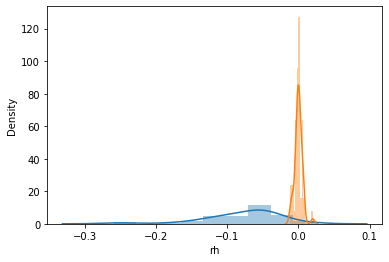

In [707]:
sns.distplot(rh_df.rs.loc[_id])
sns.distplot(rh_df.rh.loc[_id])

In [ ]:
# 1. boxplots, compare across risk measures
# 2. time series of daily return to see whether we are safe in extreme events
# 3. statistics of those extremes (subset of the samples, those dots we identified)

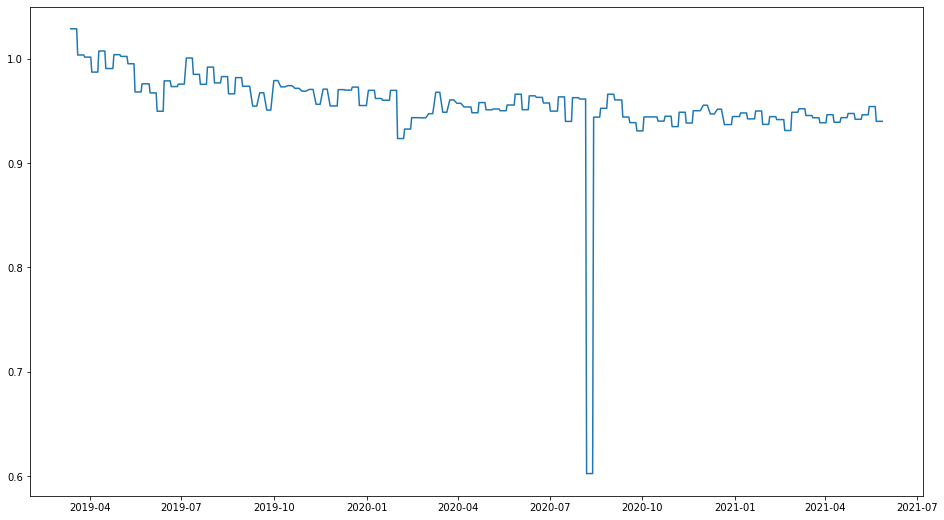

In [704]:
i=0
data_name = result_names[i]
coin_name = coin_names[i]
rh_df = pd.read_csv('../../results/%s/MM/rh_%s_copula_selection.csv'%(data_name, objective))
rh_df.Date = pd.to_datetime(rh_df.Date)

plt.figure(figsize=(16,9))
plt.plot(rh_df.Date, rh_df.h)

In [ ]:
# how do different rm work in events

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/francis/opt/anaconda3/lib/python3.7/site-pack

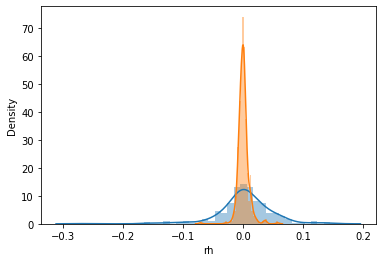

In [674]:
sns.distplot(rh_df.rs)
sns.distplot(rh_df.rh)